In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data = pd.read_csv('processed_data2.csv')

# Display the first few rows of the dataset
data.head()


,text,labels,cleaned_comment
0,<user> thanks for showing up for our appointme...,1,user thanks showing appointment today
1,haha . # lol,1,haha lol
2,i love waiting <num> min for a cab - such shor...,1,love waiting num min cab shortage user please ...
3,22 super funny quotes # funnyquotes # funnysa...,1,22 super funny quote funnyquotes funnysayings ...
4,goog morning # sorrynotsorry # morning,1,goog morning sorrynotsorry morning


## Encoding the lables

Label Encoding: This step converts categorical labels into integer values.
One-Hot Encoding: The labels are further transformed into a binary matrix format for multi-class classification.

In [9]:
# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['labels'])

# Convert labels to categorical one-hot encoding
labels = to_categorical(labels)


## pre-process

Fill NaN Values: Replaces missing values in the 'cleaned_comment' column with an empty string to avoid issues during vectorization.
TF-IDF Vectorization: Transforms the text data into numerical features based on term frequency-inverse document frequency, limited to the top 5000 features.


In [11]:
# Fill NaN values with an empty string
data['cleaned_comment'] = data['cleaned_comment'].fillna('')

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features for simplicity
features = tfidf.fit_transform(data['cleaned_comment']).toarray()

# Display sample vectorized features
print("Sample vectorized features:\n", features[:5])


Sample vectorized features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## split the data

Train-Test Split: Splits the dataset into training and testing sets to evaluate model performance.
Display Shapes: Shows the dimensions of the training and testing sets to verify the split.

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (15568, 5000)
Testing set shape: (3893, 5000)


## Simple deep learning model
Constructs a neural network with 3 layers using Dense layers for fully connected operations and Dropout layers for regularization.
Configures the model for training using categorical cross-entropy loss and the Adam optimizer.
Trains the model on the training data and evaluates it on the validation data for 10 epochs.

In [14]:
# Build the deep learning model
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)


C:\Users\91636\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.6389 - loss: 0.6178 - val_accuracy: 0.7614 - val_loss: 0.4872
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.8402 - loss: 0.3629 - val_accuracy: 0.7552 - val_loss: 0.5054
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.8917 - loss: 0.2673 - val_accuracy: 0.7562 - val_loss: 0.5598
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9345 - loss: 0.1783 - val_accuracy: 0.7575 - val_loss: 0.6913
Epoch 5/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9651 - loss: 0.1083 - val_accuracy: 0.7467 - val_loss: 0.7714
Epoch 6/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9762 - loss: 0.0707 - val_accuracy: 0.7475 - val_loss: 0.8535
Epoch 7/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9766 - loss: 0.0608 - val_accuracy: 0.7493 - val_loss: 1.0049
Epoch 8/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9813 - loss: 0.0531 - val_acc

## Evalutation the model and calculate metrix

Model Evaluation:
Evaluates the model on the test set to get the loss and accuracy.

Predictions: 
Generates predictions and calculates the predicted labels.
    
Display Labels:
Shows the first 10 actual and predicted labels for reference.
                                              
Calculate Metrics: 
Computes accuracy, precision, recall, F1 score, confusion matrix, and ROC AUC to assess the model’s performance.
    
Print Metrics: 
Outputs the computed metrics for analysis.
                    
Plot Confusion Matrix:
Visualizes the confusion matrix to show the model’s performance in terms of true positives, true negatives, false positives, and false negatives.
                    
Plot ROC Curve:
Visualizes the ROC curves for each class to show the model’s ability to distinguish between classes.

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
First 10 actual labels: [0 0 1 1 0 1 0 0 0 0]
First 10 predicted labels: [0 0 1 1 0 0 0 0 0 0]
Accuracy: 0.7480
Precision: 0.7471
Recall: 0.7480
F1 Score: 0.7470
ROC AUC: 0.8233


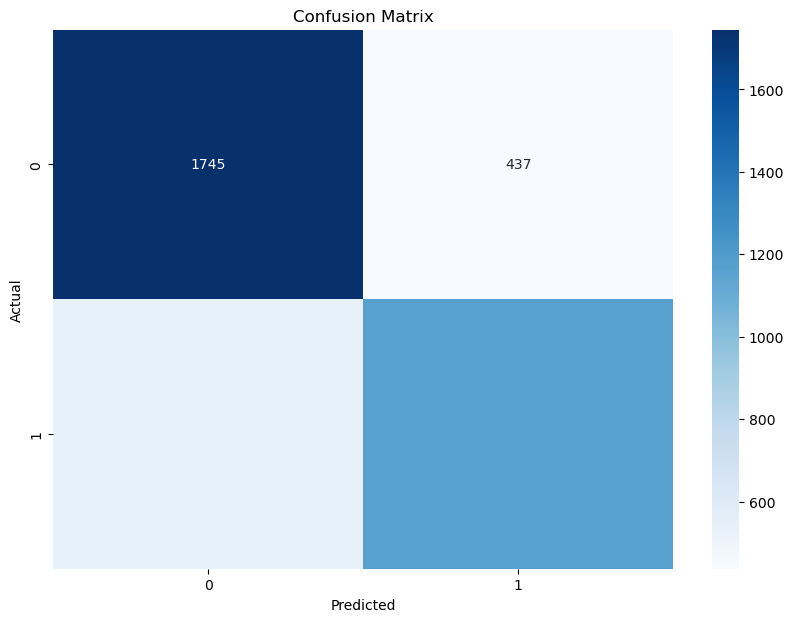

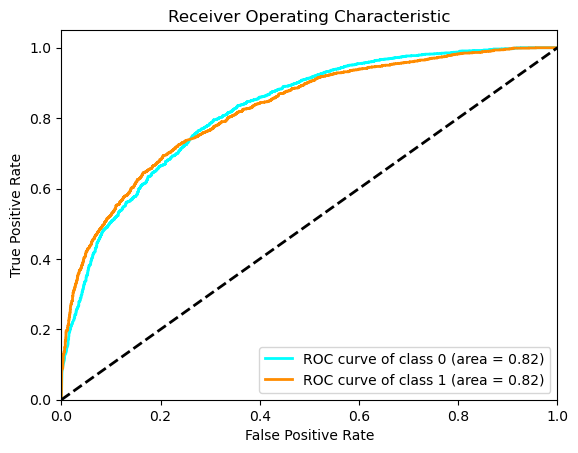

In [18]:
from sklearn.metrics import auc 

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Display first 10 actual and predicted labels for reference
print("First 10 actual labels:", y_test_true[:10])
print("First 10 predicted labels:", y_pred[:10])

# Calculate metrics
accuracy = accuracy_score(y_test_true, y_pred)
precision = precision_score(y_test_true, y_pred, average='weighted')
recall = recall_score(y_test_true, y_pred, average='weighted')
f1 = f1_score(y_test_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_true, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(y_test.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
